In [1]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.window import Window

import matplotlib.pyplot as plt

In [2]:
spark = SparkSession.builder \
        .appName("Test_Spark") \
        .getOrCreate()

In [3]:
df = spark.read.csv(r'C:\Users\Admin\PycharmProjects\Log_SmartBanking\Log_Data.csv', header=True, inferSchema=True)

In [4]:
df.show(5)

+-------------+---------------+--------------------+--------------------+--------+---+---------+----------+--------------------+----------+--------------------+--------------------+--------------------+-------+--------------------+-----------+----------+
|Số điện thoại|       Trace ID|             Request|      Kênh đăng nhập|Thiết bị| Os|OsVersion|AppVersion|                IMei|Trạng thái|        Ngày yêu cầu|       Ngày phản hồi|           IPRequest|ResCode|         Description|    MsgCode|DescDetail|
+-------------+---------------+--------------------+--------------------+--------+---+---------+----------+--------------------+----------+--------------------+--------------------+--------------------+-------+--------------------+-----------+----------+
|   xxxxxxx524|155708626851838|33 - Lấy giá trị ...|PREMB_10.53.93.13...|iPhone 6|IOS|   12.5.7|      5218|8C7B70D0-829F-411...|   Success|12/11/2023 06:55:...|12/11/2023 06:55:...|104.28.249.54:350...|     00|          Thành công|    

In [5]:
df.summary().show()

+-------+-------------+--------------------+--------------------+--------------------+----------+-------+------------------+------------------+--------------------+----------+--------------------+--------------------+--------------------+------------------+--------------------+-----------------+--------------------+
|summary|Số điện thoại|            Trace ID|             Request|      Kênh đăng nhập|  Thiết bị|     Os|         OsVersion|        AppVersion|                IMei|Trạng thái|        Ngày yêu cầu|       Ngày phản hồi|           IPRequest|           ResCode|         Description|          MsgCode|          DescDetail|
+-------+-------------+--------------------+--------------------+--------------------+----------+-------+------------------+------------------+--------------------+----------+--------------------+--------------------+--------------------+------------------+--------------------+-----------------+--------------------+
|  count|        10620|               10620|  

In [6]:
df.columns

['Số điện thoại',
 'Trace ID',
 'Request',
 'Kênh đăng nhập',
 'Thiết bị',
 'Os',
 'OsVersion',
 'AppVersion',
 'IMei',
 'Trạng thái',
 'Ngày yêu cầu',
 'Ngày phản hồi',
 'IPRequest',
 'ResCode',
 'Description',
 'MsgCode',
 'DescDetail']

In [7]:
# drop duplicated
# df = df.dropDuplicates()

# drop Null values
# df = df.na.drop()

# Tần suất request của các type

In [8]:
request_type_count = df.groupBy('Request').count().orderBy(F.desc('count'))
request_type_count.show(20)

+--------------------+-----+
|             Request|count|
+--------------------+-----+
|10 - Lấy danh sác...| 1541|
|59 - Lấy thông ti...| 1514|
|33 - Lấy giá trị ...| 1391|
|31 - Lấy danh sác...| 1247|
|       1 - Đăng nhập| 1061|
|102 - Khởi tạo ch...|  592|
|103 - Xác thực ch...|  565|
|201 - Lấy thông t...|  510|
|225 - Lấy danh sá...|  290|
|202 - Lấy danh sá...|  245|
|200 - Lấy thông t...|  162|
|100 - Khởi tạo ch...|  150|
|101 - Xác nhận ch...|  145|
|          9 - Logout|  116|
|722 - Loyalty: Lấ...|   92|
|115 - Khởi tạo nạ...|   70|
|723 - Loyalty: ki...|   70|
|718 - Loyalty: Lấ...|   66|
|705 - Loyalty: Lấ...|   65|
|116 - Xác nhận nạ...|   63|
+--------------------+-----+
only showing top 20 rows



# Xác định top 20 request được sử dụng nhiều nhất

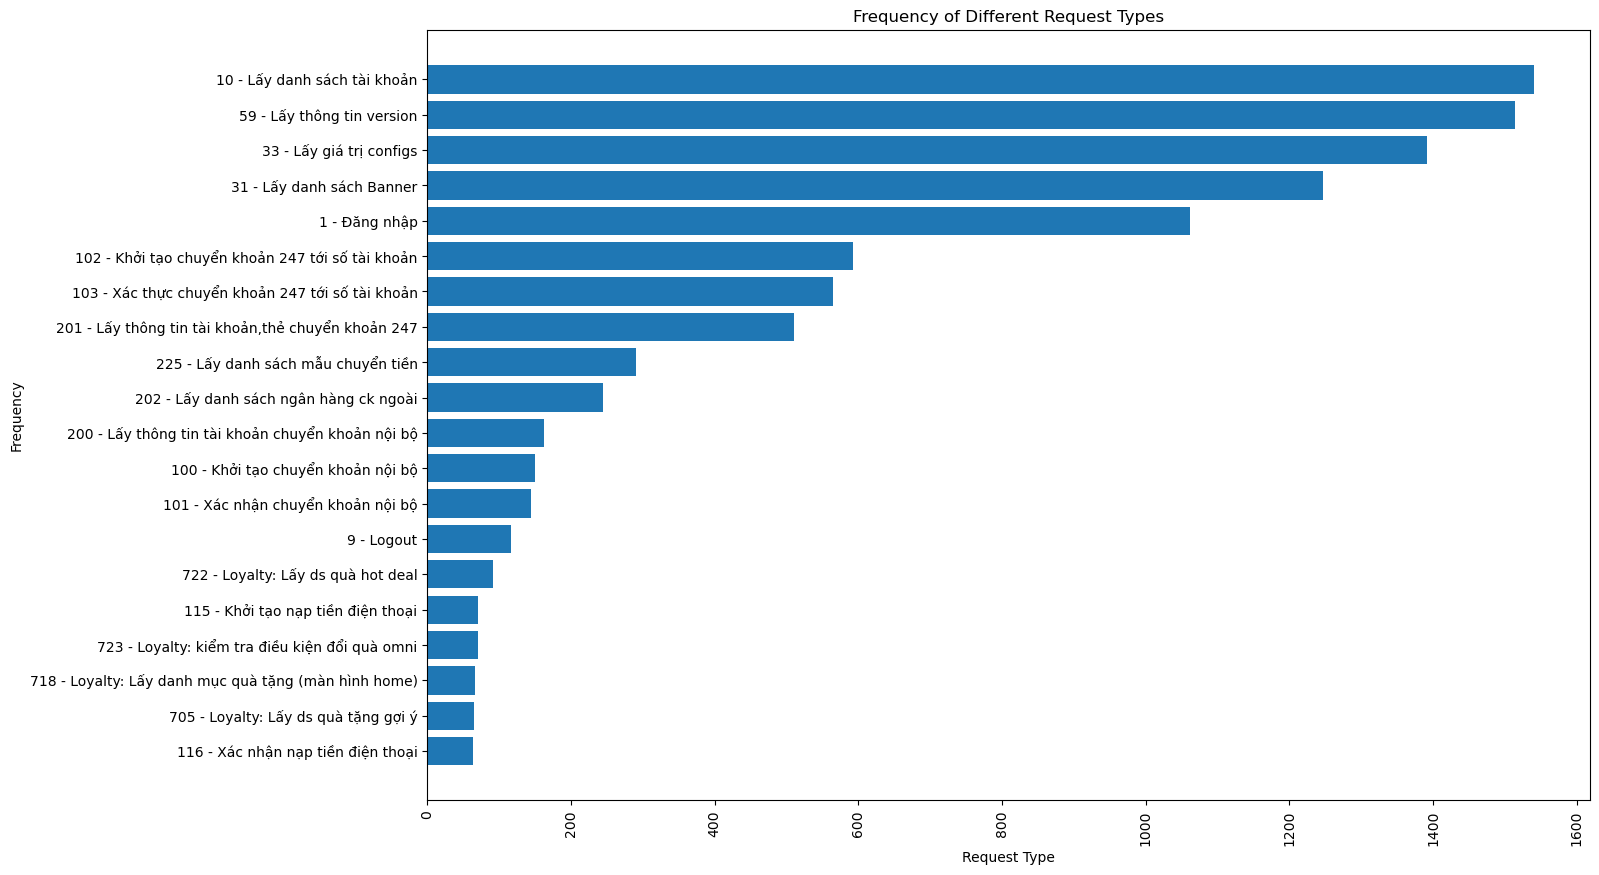

In [9]:
request_type_counts_pd = request_type_count.toPandas().head(20)
request_type_counts_pd = request_type_counts_pd.sort_values('count', ascending=True)
# Plotting
plt.figure(figsize=(15, 10))
plt.barh(request_type_counts_pd['Request'], request_type_counts_pd['count'])
plt.xlabel('Request Type')
plt.ylabel('Frequency')
plt.title('Frequency of Different Request Types')
plt.xticks(rotation= 90)  # Rotate labels if they are long
plt.show()

In [10]:
# failed rate chung trên toàn tập data

In [11]:
status_analysis = df.groupBy('Trạng thái').count().orderBy(F.desc('count'))
status_analysis.show()

+----------+-----+
|Trạng thái|count|
+----------+-----+
|   Success|10243|
|     False|  377|
+----------+-----+



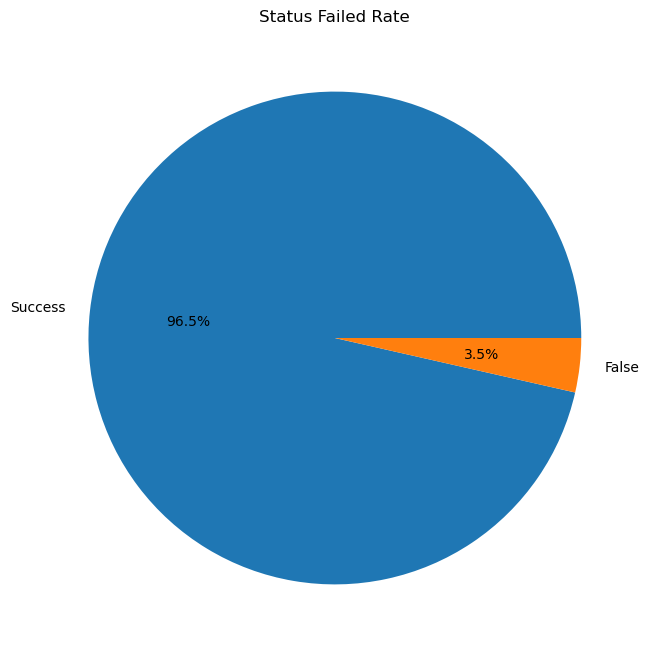

In [12]:
status_analysis_pd = status_analysis.toPandas()

# Plotting - Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(status_analysis_pd['count'], labels=status_analysis_pd['Trạng thái'], autopct='%1.1f%%')
plt.title('Status Failed Rate')
plt.show()

In [13]:
# format lại các cột timestamp

In [14]:
df = df.withColumn('Ngày yêu cầu', F.to_timestamp(F.col('Ngày yêu cầu'), 'dd/MM/yyyy hh:mm:ss a'))
df = df.withColumn('Ngày phản hồi', F.to_timestamp(F.col('Ngày phản hồi'), 'dd/MM/yyyy hh:mm:ss a'))
df.show(5)

+-------------+---------------+--------------------+--------------------+--------+---+---------+----------+--------------------+----------+-------------------+-------------------+--------------------+-------+--------------------+-----------+----------+
|Số điện thoại|       Trace ID|             Request|      Kênh đăng nhập|Thiết bị| Os|OsVersion|AppVersion|                IMei|Trạng thái|       Ngày yêu cầu|      Ngày phản hồi|           IPRequest|ResCode|         Description|    MsgCode|DescDetail|
+-------------+---------------+--------------------+--------------------+--------+---+---------+----------+--------------------+----------+-------------------+-------------------+--------------------+-------+--------------------+-----------+----------+
|   xxxxxxx524|155708626851838|33 - Lấy giá trị ...|PREMB_10.53.93.13...|iPhone 6|IOS|   12.5.7|      5218|8C7B70D0-829F-411...|   Success|2023-11-12 18:55:02|2023-11-12 18:55:02|104.28.249.54:350...|     00|          Thành công|    INFO-00|

In [15]:
df = df.withColumn('Ngày yêu cầu_date', F.date_format(F.col('Ngày yêu cầu'), 'yyyy-MM-dd'))
df = df.withColumn('Ngày yêu cầu_hour', F.date_format(F.col('Ngày yêu cầu'), 'HH'))

df = df.withColumn('Ngày phản hồi_date', F.date_format(F.col('Ngày phản hồi'), 'yyyy-MM-dd'))
df = df.withColumn('Ngày phản hồi_hour', F.date_format(F.col('Ngày phản hồi'), 'HH'))

df.show(5)

+-------------+---------------+--------------------+--------------------+--------+---+---------+----------+--------------------+----------+-------------------+-------------------+--------------------+-------+--------------------+-----------+----------+-----------------+-----------------+------------------+------------------+
|Số điện thoại|       Trace ID|             Request|      Kênh đăng nhập|Thiết bị| Os|OsVersion|AppVersion|                IMei|Trạng thái|       Ngày yêu cầu|      Ngày phản hồi|           IPRequest|ResCode|         Description|    MsgCode|DescDetail|Ngày yêu cầu_date|Ngày yêu cầu_hour|Ngày phản hồi_date|Ngày phản hồi_hour|
+-------------+---------------+--------------------+--------------------+--------+---+---------+----------+--------------------+----------+-------------------+-------------------+--------------------+-------+--------------------+-----------+----------+-----------------+-----------------+------------------+------------------+
|   xxxxxxx524|1557

In [16]:
# tính response time của request

In [17]:
df = df.withColumn('Response_time', F.unix_timestamp('Ngày phản hồi') - F.unix_timestamp('Ngày yêu cầu'))

In [18]:
df.show()

+-------------+---------------+--------------------+--------------------+--------+---+---------+----------+--------------------+----------+-------------------+-------------------+--------------------+-------+--------------------+------------------+----------+-----------------+-----------------+------------------+------------------+-------------+
|Số điện thoại|       Trace ID|             Request|      Kênh đăng nhập|Thiết bị| Os|OsVersion|AppVersion|                IMei|Trạng thái|       Ngày yêu cầu|      Ngày phản hồi|           IPRequest|ResCode|         Description|           MsgCode|DescDetail|Ngày yêu cầu_date|Ngày yêu cầu_hour|Ngày phản hồi_date|Ngày phản hồi_hour|Response_time|
+-------------+---------------+--------------------+--------------------+--------+---+---------+----------+--------------------+----------+-------------------+-------------------+--------------------+-------+--------------------+------------------+----------+-----------------+-----------------+---------

# Phân phối lượng request theo giờ

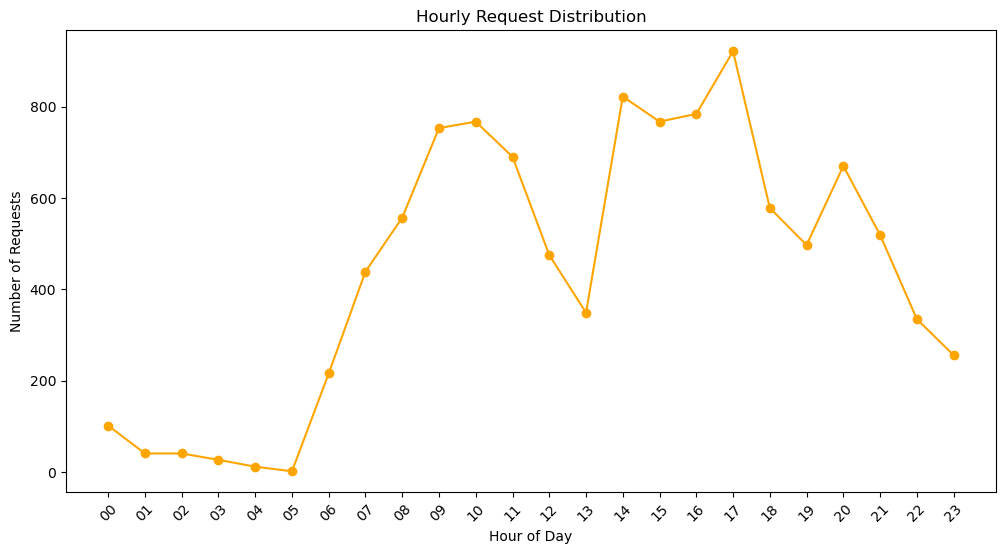

In [19]:
hourly_request_counts = df.groupBy('Ngày yêu cầu_hour').count().orderBy('Ngày yêu cầu_hour')
hourly_request_counts_pd = hourly_request_counts.toPandas()

plt.figure(figsize=(12, 6))
plt.plot(hourly_request_counts_pd['Ngày yêu cầu_hour'], hourly_request_counts_pd['count'], marker='o', color='orange')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Requests')
plt.title('Hourly Request Distribution')
plt.xticks(rotation=45)
plt.show()

# Phân phối lượng request theo ngày trong tuần

In [20]:
df = df.withColumn('day_of_week', F.date_format(F.col('Ngày phản hồi_date'), 'E'))
day_of_week_counts = df.groupBy('day_of_week').count().orderBy('day_of_week')

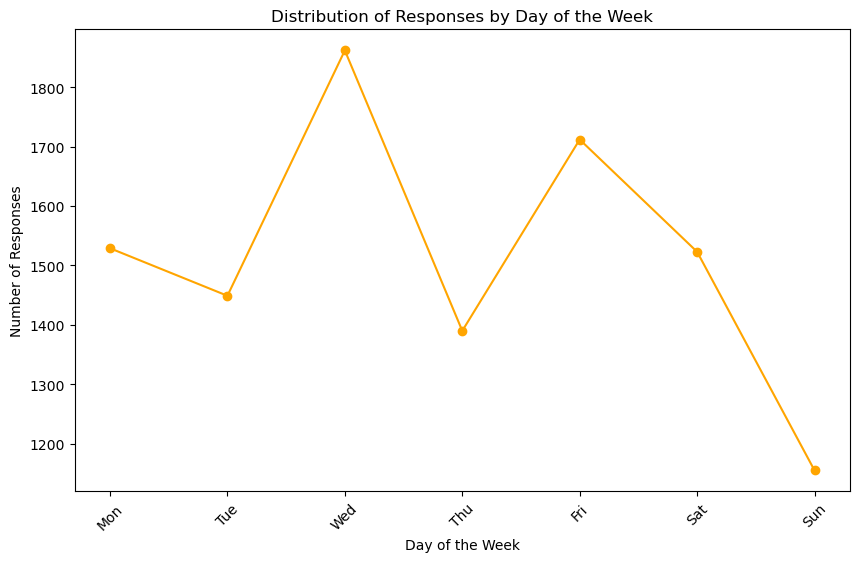

In [21]:
day_of_week_counts_pd = day_of_week_counts.toPandas()
day_of_week_order = {'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu': 4, 'Fri': 5, 'Sat': 6, 'Sun': 7}

# Map the 'day_of_week' to a numeric value for sorting
day_of_week_counts_pd['day_of_week_num'] = day_of_week_counts_pd['day_of_week'].map(day_of_week_order)

# Sort by the numeric day of the week
day_of_week_counts_pd = day_of_week_counts_pd.sort_values('day_of_week_num')
plt.figure(figsize=(10, 6))
plt.plot(day_of_week_counts_pd['day_of_week'], day_of_week_counts_pd['count'], marker='o', color='orange')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Responses')
plt.title('Distribution of Responses by Day of the Week')
plt.xticks(rotation=45)
plt.show()


In [22]:
df.select('IPRequest').show(5,truncate= False)

+------------------------------------+
|IPRequest                           |
+------------------------------------+
|104.28.249.54:35002|10.53.54.89_Prod|
|104.28.249.54:31236|10.53.54.89_Prod|
|104.28.217.54:43860|10.53.54.89_Prod|
|104.28.217.54:15549|10.53.54.89_Prod|
|104.28.217.54:47018|10.53.54.89_Prod|
+------------------------------------+
only showing top 5 rows



In [23]:
df.columns

['Số điện thoại',
 'Trace ID',
 'Request',
 'Kênh đăng nhập',
 'Thiết bị',
 'Os',
 'OsVersion',
 'AppVersion',
 'IMei',
 'Trạng thái',
 'Ngày yêu cầu',
 'Ngày phản hồi',
 'IPRequest',
 'ResCode',
 'Description',
 'MsgCode',
 'DescDetail',
 'Ngày yêu cầu_date',
 'Ngày yêu cầu_hour',
 'Ngày phản hồi_date',
 'Ngày phản hồi_hour',
 'Response_time',
 'day_of_week']

In [24]:
df.groupBy('Os').count().show(5)

+-------+-----+
|     Os|count|
+-------+-----+
|ANDROID| 3655|
|IOS_WEB|   33|
|    IOS| 6812|
|WINDOWS|  120|
+-------+-----+



# xác định công cụ khách hàng sử dụng khi sử dụng (SmartBanking(Mobile)/IBank(Web))

In [25]:
df = df.withColumn('Access Type', F.when(F.col('Kênh đăng nhập').contains('MB_'), 'SmartBanking').when(F.col('Kênh đăng nhập').contains('IB_'), 'IBank'))

# Xác định failed rate của từng platform (SmartBanking(Mobile)/IBank(Web))

In [26]:
test_df = df.groupBy('Access Type').pivot('Trạng thái').agg(F.count('Trạng thái'))
test_df.show()

+------------+-----+-------+
| Access Type|False|Success|
+------------+-----+-------+
|       IBank|   16|    137|
|SmartBanking|  361|  10106|
+------------+-----+-------+



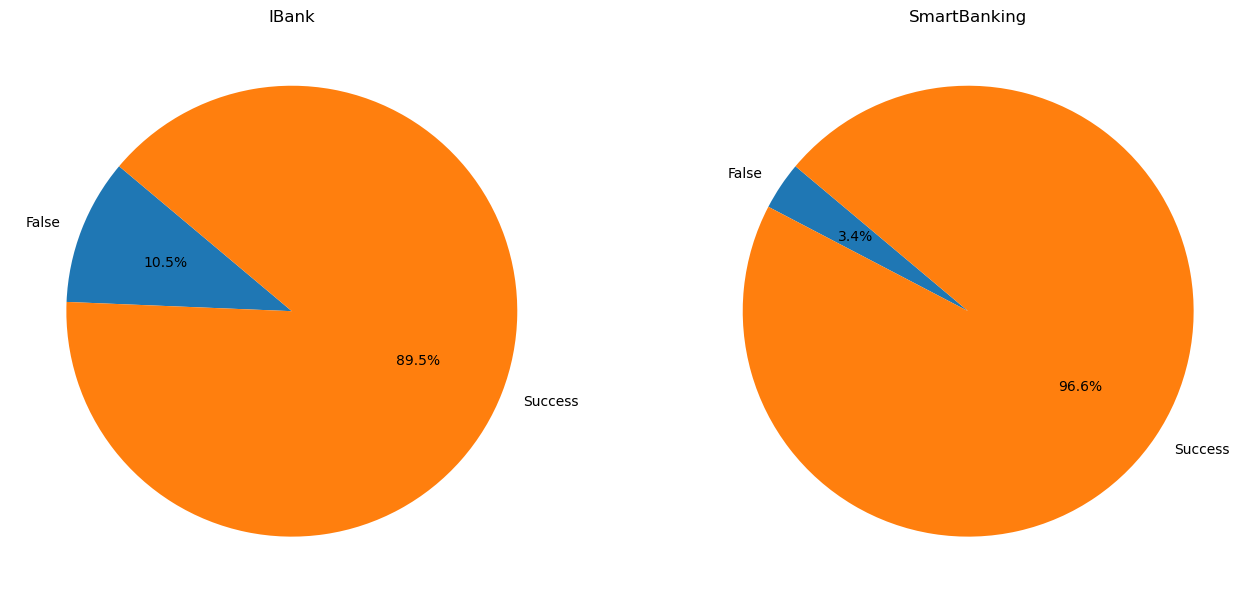

In [27]:
test_df = test_df.toPandas()
fig, ax = plt.subplots(1, 2, figsize=(16, 10))
for i, (request, data) in enumerate(test_df.iterrows()):
    ax[i].pie(data[1:], labels=data[1:].index, autopct='%1.1f%%', startangle=140)
    ax[i].set_title(data['Access Type'])

# Xác định những request có failed rate cao

In [28]:

# Assuming 'FailureStatusValue' indicates a failure in the 'Status' column
failure_status_value = 'False'

# Count total and failure requests
request_stats = (df.groupBy('Request')
                 .agg(F.count('*').alias('total_requests'),
                      F.sum(F.when(F.col('Trạng thái') == failure_status_value, 1).otherwise(0)).alias('failed_requests')))

# Calculate failure rate
request_stats = request_stats.withColumn('failure_rate', (F.col('failed_requests') / F.col('total_requests')) * 100)
request_stats.show(10)

+--------------------+--------------+---------------+------------------+
|             Request|total_requests|failed_requests|      failure_rate|
+--------------------+--------------+---------------+------------------+
|     8 - Gửi lại OTP|             1|              0|               0.0|
|13 - Cài đặt tài ...|             1|              0|               0.0|
|161 - Lấy phương ...|             6|              0|               0.0|
|3 - Kích hoạt lại...|             3|              1| 33.33333333333333|
|422 - ekyc danh s...|             5|              0|               0.0|
|302 - Kiểm tra gi...|            15|             15|             100.0|
|31 - Lấy danh sác...|          1247|              0|               0.0|
|201 - Lấy thông t...|           510|             45| 8.823529411764707|
|       1 - Đăng nhập|          1061|            129|12.158341187558905|
|220 - Lấy danh sá...|            56|              0|               0.0|
+--------------------+--------------+--------------

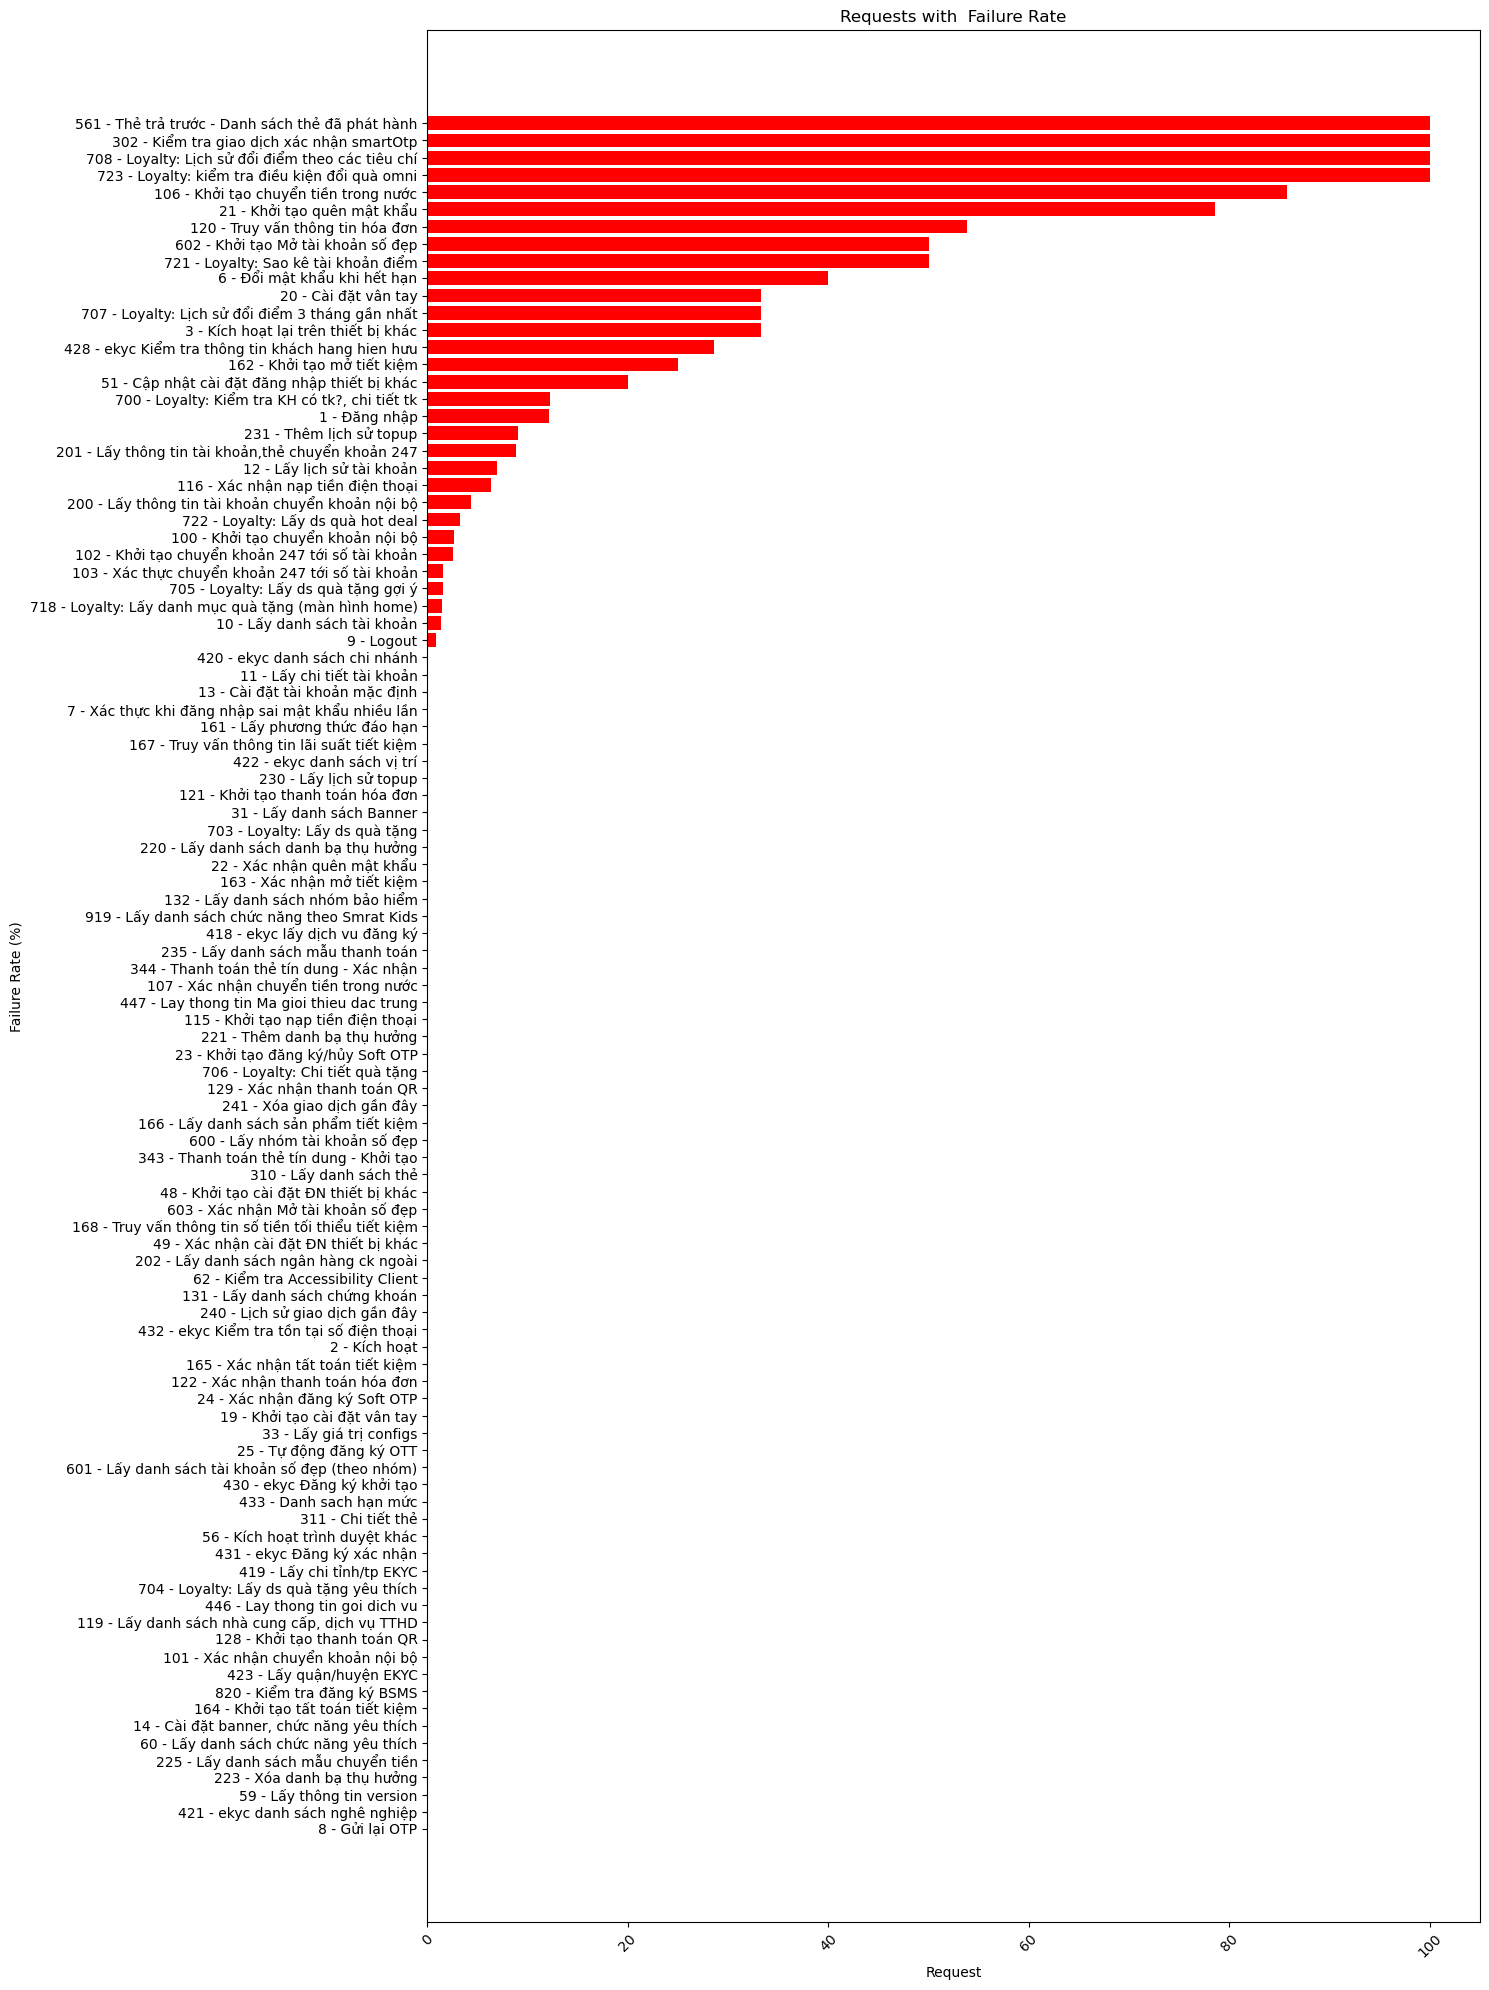

In [29]:
request_stats_pd = request_stats.toPandas()
request_stats_pd.sort_values(by='failure_rate', ascending=True, inplace=True)

# Plotting
plt.figure(figsize=(15, 20))
plt.barh(request_stats_pd['Request'], request_stats_pd['failure_rate'], color='red')
plt.xlabel('Request')
plt.ylabel('Failure Rate (%)')
plt.title('Requests with  Failure Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Xác định những request có failed rate > 5%

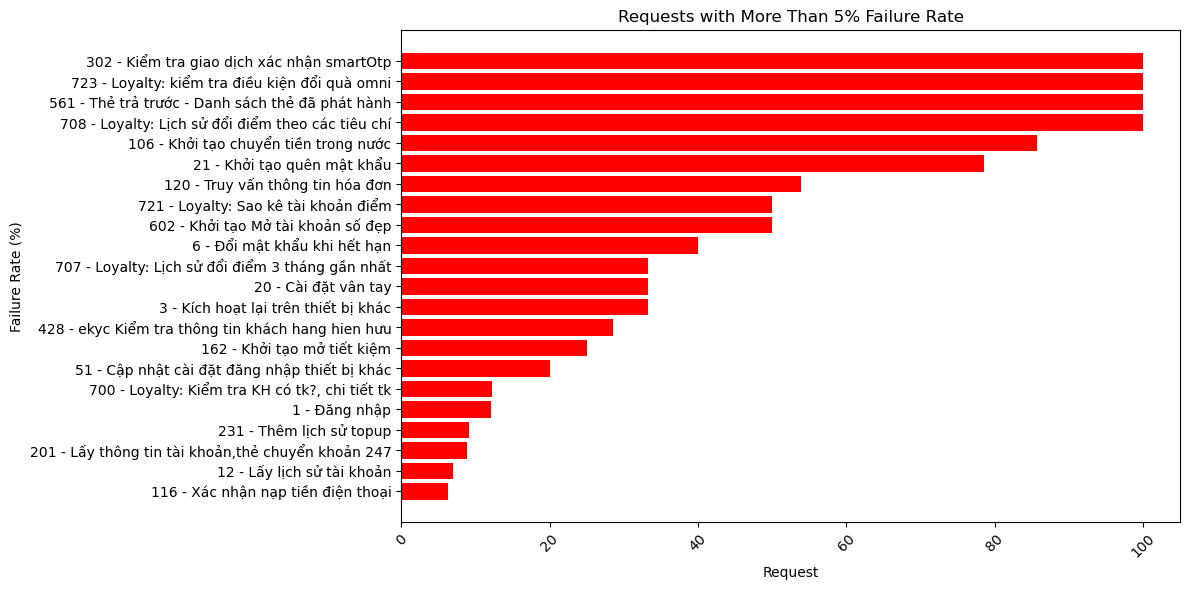

In [30]:
# Filter requests with more than 5% failure rate
high_failure_requests = request_stats.filter(F.col('failure_rate') > 5)
high_failure_requests_pd = high_failure_requests.toPandas()
high_failure_requests_pd.sort_values(by='failure_rate', ascending=True, inplace=True)

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(high_failure_requests_pd['Request'], high_failure_requests_pd['failure_rate'], color='red')
plt.xlabel('Request')
plt.ylabel('Failure Rate (%)')
plt.title('Requests with More Than 5% Failure Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
df.columns

['Số điện thoại',
 'Trace ID',
 'Request',
 'Kênh đăng nhập',
 'Thiết bị',
 'Os',
 'OsVersion',
 'AppVersion',
 'IMei',
 'Trạng thái',
 'Ngày yêu cầu',
 'Ngày phản hồi',
 'IPRequest',
 'ResCode',
 'Description',
 'MsgCode',
 'DescDetail',
 'Ngày yêu cầu_date',
 'Ngày yêu cầu_hour',
 'Ngày phản hồi_date',
 'Ngày phản hồi_hour',
 'Response_time',
 'day_of_week',
 'Access Type']

In [32]:
df.show(truncate= False)

+-------------+---------------+------------------------------------------------+---------------------------------------------+--------+---+---------+----------+------------------------------------+----------+-------------------+-------------------+------------------------------------+-------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------+----------+-----------------+-----------------+------------------+------------------+-------------+-----------+------------+
|Số điện thoại|Trace ID       |Request                                         |Kênh đăng nhập                               |Thiết bị|Os |OsVersion|AppVersion|IMei                                |Trạng thái|Ngày yêu cầu       |Ngày phản hồi      |IPRequest                           |ResCode

In [33]:
# Define a window spec partitioned by IMEI and Request, and ordered by date
windowSpec = Window.partitionBy(['IMei', 'Ngày yêu cầu_date']).orderBy('Ngày yêu cầu_date')

# Add a column that flags 'False' statuses
df = df.withColumn('Status_Flag', F.when(df['Trạng thái'] == 'False', 1).otherwise(0))

# Create a new column to identify changes in status
changeFlag = F.lag(df['Status_Flag']).over(windowSpec) != df['Status_Flag']
df = df.withColumn('Status_Change', F.when(changeFlag, 1).otherwise(0))

# Cumulatively sum the change flags to create a group ID for consecutive statuses
df = df.withColumn('Group_ID', F.sum('Status_Change').over(windowSpec.rowsBetween(Window.unboundedPreceding, Window.currentRow)))

# Redefine the window spec to partition by the new group ID
windowSpecGroup = Window.partitionBy('IMei', 'Ngày yêu cầu_date', 'Group_ID').orderBy('Ngày yêu cầu')

# Calculate the sum of 'False' statuses in each group
df = df.withColumn('Consecutive_False_Sum', F.sum('Status_Flag').over(windowSpecGroup))

consecutive_false_requests = df.filter((df['Consecutive_False_Sum'] >= 3) & (df['Status_Flag'] == 1))

# Select the relevant columns
consecutive_false_requests = consecutive_false_requests.select('IMei', 'Request', 'Trạng thái', 'Ngày yêu cầu_date', 'Group_ID', 'Consecutive_False_Sum')
w = Window.partitionBy('IMei', 'Request').orderBy(F.desc('Consecutive_False_Sum'))
result = (consecutive_false_requests
    .withColumn('no_failed', F.first('Consecutive_False_Sum').over(w)).filter('no_failed = Consecutive_False_Sum'))
result.show(truncate= False)


+----------------------------------------------------------+----------------------------------------------------+----------+-----------------+--------+---------------------+---------+
|IMei                                                      |Request                                             |Trạng thái|Ngày yêu cầu_date|Group_ID|Consecutive_False_Sum|no_failed|
+----------------------------------------------------------+----------------------------------------------------+----------+-----------------+--------+---------------------+---------+
|###06c9f61ca7e332b9###00000000-3378-c3c9-ffff-ffffef05ac4a|102 - Khởi tạo chuyển khoản 247 tới số tài khoản    |False     |2023-10-25       |1       |7                    |7        |
|###4bd0fc796f89c913###00000000-1f85-93b2-ffff-ffffef05ac4a|1 - Đăng nhập                                       |False     |2023-11-11       |1       |3                    |3        |
|###8feeee9fb2b6c630###ffffffff-a627-e1b3-ffff-ffffef05ac4a|1 - Đăng nhập       

In [34]:
result[result['IMei'] == '###06c9f61ca7e332b9###00000000-3378-c3c9-ffff-ffffef05ac4a'].show(truncate= False)

+----------------------------------------------------------+------------------------------------------------+----------+-----------------+--------+---------------------+---------+
|IMei                                                      |Request                                         |Trạng thái|Ngày yêu cầu_date|Group_ID|Consecutive_False_Sum|no_failed|
+----------------------------------------------------------+------------------------------------------------+----------+-----------------+--------+---------------------+---------+
|###06c9f61ca7e332b9###00000000-3378-c3c9-ffff-ffffef05ac4a|102 - Khởi tạo chuyển khoản 247 tới số tài khoản|False     |2023-10-25       |1       |7                    |7        |
+----------------------------------------------------------+------------------------------------------------+----------+-----------------+--------+---------------------+---------+



In [35]:
def process_data(df, imei_col='IMei', request_date_col='Ngày yêu cầu_date', status_col='Trạng thái', false_sum_threshold=3):
    # Define a window spec partitioned by IMEI and Request, and ordered by date
    windowSpec = Window.partitionBy([imei_col, request_date_col]).orderBy(request_date_col)

    # Add a column that flags 'False' statuses
    df = df.withColumn('Status_Flag', F.when(df[status_col] == 'False', 1).otherwise(0))

    # Create a new column to identify changes in status
    changeFlag = F.lag(df['Status_Flag']).over(windowSpec) != df['Status_Flag']
    df = df.withColumn('Status_Change', F.when(changeFlag, 1).otherwise(0))

    # Cumulatively sum the change flags to create a group ID for consecutive statuses
    df = df.withColumn('Group_ID', F.sum('Status_Change').over(windowSpec.rowsBetween(Window.unboundedPreceding, Window.currentRow)))

    # Redefine the window spec to partition by the new group ID
    windowSpecGroup = Window.partitionBy(imei_col, request_date_col, 'Group_ID').orderBy('Ngày yêu cầu')

    # Calculate the sum of 'False' statuses in each group
    df = df.withColumn('Consecutive_False_Sum', F.sum('Status_Flag').over(windowSpecGroup))

    # Filter based on the false_sum_threshold
    consecutive_false_requests = df.filter((df['Consecutive_False_Sum'] >= false_sum_threshold) & (df['Status_Flag'] == 1))

    # Select the relevant columns
    consecutive_false_requests = consecutive_false_requests.select(imei_col, 'Request', status_col, request_date_col, 'Group_ID', 'Consecutive_False_Sum')
    w = Window.partitionBy(imei_col, 'Request').orderBy(F.desc('Consecutive_False_Sum'))
    result = (consecutive_false_requests
        .withColumn('no_failed', F.first('Consecutive_False_Sum').over(w)).filter('no_failed = Consecutive_False_Sum'))
    
    return result

# Usage example
result_df = process_data(df)
result_df.show(truncate=False)


+----------------------------------------------------------+----------------------------------------------------+----------+-----------------+--------+---------------------+---------+
|IMei                                                      |Request                                             |Trạng thái|Ngày yêu cầu_date|Group_ID|Consecutive_False_Sum|no_failed|
+----------------------------------------------------------+----------------------------------------------------+----------+-----------------+--------+---------------------+---------+
|###06c9f61ca7e332b9###00000000-3378-c3c9-ffff-ffffef05ac4a|102 - Khởi tạo chuyển khoản 247 tới số tài khoản    |False     |2023-10-25       |1       |7                    |7        |
|###4bd0fc796f89c913###00000000-1f85-93b2-ffff-ffffef05ac4a|1 - Đăng nhập                                       |False     |2023-11-11       |1       |3                    |3        |
|###8feeee9fb2b6c630###ffffffff-a627-e1b3-ffff-ffffef05ac4a|1 - Đăng nhập       

In [36]:
# Filter the DataFrame to get only the records where 'Consecutive_False_Sum' is at least 3
consecutive_false_requests = df.filter((df['Consecutive_False_Sum'] >= 3) & (df['Status_Flag'] == 1))

# Select the relevant columns
consecutive_false_requests = consecutive_false_requests.select('IMei', 'Request', 'Trạng thái', 'Ngày yêu cầu', 'Group_ID', 'Consecutive_False_Sum')
w = Window.partitionBy('IMei', 'Request').orderBy(F.desc('Consecutive_False_Sum'))
result = (consecutive_false_requests
    .withColumn('no_failed', F.first('Consecutive_False_Sum').over(w)).filter('no_failed = Consecutive_False_Sum'))
result.show(truncate= False)

+----------------------------------------------------------+----------------------------------------------------+----------+-------------------+--------+---------------------+---------+
|IMei                                                      |Request                                             |Trạng thái|Ngày yêu cầu       |Group_ID|Consecutive_False_Sum|no_failed|
+----------------------------------------------------------+----------------------------------------------------+----------+-------------------+--------+---------------------+---------+
|###06c9f61ca7e332b9###00000000-3378-c3c9-ffff-ffffef05ac4a|102 - Khởi tạo chuyển khoản 247 tới số tài khoản    |False     |2023-10-25 00:00:15|1       |7                    |7        |
|###4bd0fc796f89c913###00000000-1f85-93b2-ffff-ffffef05ac4a|1 - Đăng nhập                                       |False     |2023-11-11 09:03:29|1       |3                    |3        |
|###8feeee9fb2b6c630###ffffffff-a627-e1b3-ffff-ffffef05ac4a|1 - Đăng n

In [37]:
test_df = df[(df['IMei'] == '###cc6ebd61e04669d5###00000000-4eb6-8dd9-ffff-ffffef05ac4a')].toPandas()
test_df.to_excel('test_6.xlsx', index= False)

C:\Spark\spark-3.3.2-bin-hadoop2\python\pyspark\sql\pandas\conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
C:\Spark\spark-3.3.2-bin-hadoop2\python\pyspark\sql\pandas\conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


In [38]:
test_df.to_excel('test_5.xlsx', index= False)

In [39]:
data = [("Category1", "Sub1", "2021-01-01", 100),
        ("Category1", "Sub1", "2021-01-02", 150),
        ("Category1", "Sub2", "2021-01-01", 200),
        ("Category2", "Sub1", "2021-01-01", 250),
        ("Category2", "Sub2", "2021-01-01", 300)]
columns = ["Category", "Subcategory", "Date", "Sales"]

# Create DataFrame
df_test = spark.createDataFrame(data, columns)

# Define window specification
windowSpec = Window.partitionBy(["Category", "Date"]).orderBy("Date").rowsBetween(Window.unboundedPreceding, Window.currentRow)

# Calculate cumulative sum of sales within each category and subcategory
df_test = df_test.withColumn("Cumulative_Sales", F.sum("Sales").over(windowSpec))

# Show the result
df_test.show()

+---------+-----------+----------+-----+----------------+
| Category|Subcategory|      Date|Sales|Cumulative_Sales|
+---------+-----------+----------+-----+----------------+
|Category1|       Sub1|2021-01-01|  100|             100|
|Category1|       Sub2|2021-01-01|  200|             300|
|Category1|       Sub1|2021-01-02|  150|             150|
|Category2|       Sub1|2021-01-01|  250|             250|
|Category2|       Sub2|2021-01-01|  300|             550|
+---------+-----------+----------+-----+----------------+



In [40]:
import os
import pandas as pd
from datetime import datetime, timedelta

def save_merged_data(data_file_path, map_file_path, output_dir):
    # Load the data and mapping files
    data = pd.read_csv(data_file_path)
    map_data = pd.read_csv(map_file_path)

    data['Request'] = data['Request'].str.split(' -').str[0]

    # Convert 'Ngày yêu cầu' to datetime
    data['Ngày yêu cầu'] = pd.to_datetime(data['Ngày yêu cầu'], format='%d/%m/%Y %I:%M:%S %p')
    data['Ngày phản hồi'] = pd.to_datetime(data['Ngày phản hồi'], format='%d/%m/%Y %I:%M:%S %p')

    # Convert 'First Number' to the same type as 'MID' for accurate mapping
    data['Request'] = data['Request'].astype(map_data['MID'].dtype)
    # Adjust the datetime by subtracting 5 hours
    data['Adjusted Date'] = data['Ngày yêu cầu'] - timedelta(hours=5)

    merged_data = pd.merge(data, map_data, left_on='Request', right_on='MID', how='left')
    # Group by the date of the adjusted datetime
    grouped = merged_data.groupby(data['Ngày yêu cầu'].dt.date)

    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Save each group to a Parquet file
    for date, group in grouped:
        # Remove the 'Adjusted Date' column before saving
        group = group.drop(columns=['Adjusted Date'])

        # Format the date as YYYYMMDD for the file name
        formatted_date = date.strftime('%Y%m%d')

        file_name = f'{formatted_date}.csv'
        file_path = os.path.join(output_dir, file_name)
        group.to_csv(file_path, index=False)
        print(f'Saved: {file_name}')

# Example usage
map_file = r'C:\Users\Admin\PycharmProjects\Log_SmartBanking\Map.csv'  # Replace with your map file path
input_file = r'C:\Users\Admin\PycharmProjects\Log_SmartBanking\Log_Data.csv'  # Replace with your file path
output_directory = r'C:\Users\Admin\PycharmProjects\Log_SmartBanking\Log'  # Replace with your desired output directory

save_merged_data(input_file, map_file, output_directory)


Saved: 20231013.csv
Saved: 20231014.csv
Saved: 20231015.csv
Saved: 20231016.csv
Saved: 20231017.csv
Saved: 20231018.csv
Saved: 20231019.csv
Saved: 20231020.csv
Saved: 20231021.csv
Saved: 20231022.csv
Saved: 20231023.csv
Saved: 20231024.csv
Saved: 20231025.csv
Saved: 20231026.csv
Saved: 20231027.csv
Saved: 20231028.csv
Saved: 20231029.csv
Saved: 20231030.csv
Saved: 20231031.csv
Saved: 20231101.csv
Saved: 20231102.csv
Saved: 20231103.csv
Saved: 20231104.csv
Saved: 20231105.csv
Saved: 20231106.csv
Saved: 20231107.csv
Saved: 20231108.csv
Saved: 20231109.csv
Saved: 20231110.csv
Saved: 20231111.csv
Saved: 20231112.csv


In [42]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date, split
import os

def save_merged_data_spark(data_file_path, map_file_path, output_dir):
    # Initialize Spark session
    # spark = SparkSession.builder.appName("DataMerge").getOrCreate()

    # Load the data and mapping files using Spark
    data = spark.read.csv(data_file_path, header=True, inferSchema=True)
    map_data = spark.read.csv(map_file_path, header=True, inferSchema=True)

    # Processing the 'Request' column
    data = data.withColumn('Request', split(col('Request'), ' -').getItem(0))

    # Convert 'Ngày yêu cầu' and 'Ngày phản hồi' to datetime
    data = data.withColumn('Ngày yêu cầu', to_date(col('Ngày yêu cầu'), 'dd/MM/yyyy hh:mm:ss a'))
    data = data.withColumn('Ngày phản hồi', to_date(col('Ngày phản hồi'), 'dd/MM/yyyy hh:mm:ss a'))

    # Ensure 'Request' is of the same type as 'MID' for accurate mapping
    data = data.withColumn('Request', col('Request').cast(map_data.schema['MID'].dataType))

    # Merge data
    merged_data = data.join(map_data, data['Request'] == map_data['MID'], 'left')

    # Group by the date of 'Ngày yêu cầu'
    grouped_data = merged_data.groupBy(to_date(col('Ngày yêu cầu')).alias('Date')).count()

    # return merged_data
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Save each group to a Parquet file
    for date_row in grouped_data.collect():
        date = date_row['Date']
        formatted_date = date.strftime('%Y%m%d')
        file_name = f'{formatted_date}.parquet'
        file_path = os.path.join(output_dir, file_name)

        # Filter data for the specific date and write to Parquet
        merged_data.filter(to_date(col('Ngày yêu cầu')) == date).write.parquet(file_path, mode='overwrite')
        print(f'Saved: {file_name}')


map_file = r'C:\Users\Admin\PycharmProjects\Log_SmartBanking\Map.csv'  # Replace with your map file path
input_file = r'C:\Users\Admin\PycharmProjects\Log_SmartBanking\Log_Data.csv'  # Replace with your file path
output_directory = r'C:\Users\Admin\PycharmProjects\Log_SmartBanking\Log_Parquet'  # Replace with your desired output directory

save_merged_data_spark(input_file, map_file, output_directory)


Saved: 20231108.parquet
Saved: 20231104.parquet
Saved: 20231029.parquet
Saved: 20231013.parquet
Saved: 20231105.parquet
Saved: 20231025.parquet
Saved: 20231016.parquet
Saved: 20231031.parquet
Saved: 20231015.parquet
Saved: 20231018.parquet
Saved: 20231027.parquet
Saved: 20231112.parquet
Saved: 20231110.parquet
Saved: 20231103.parquet
Saved: 20231109.parquet
Saved: 20231023.parquet
Saved: 20231107.parquet
Saved: 20231101.parquet
Saved: 20231021.parquet
Saved: 20231014.parquet
Saved: 20231106.parquet
Saved: 20231020.parquet
Saved: 20231019.parquet
Saved: 20231102.parquet
Saved: 20231022.parquet
Saved: 20231017.parquet
Saved: 20231111.parquet
Saved: 20231026.parquet
Saved: 20231028.parquet
Saved: 20231030.parquet
Saved: 20231024.parquet


In [50]:
test_df = spark.read.parquet(r'C:\Users\Admin\PycharmProjects\Log_SmartBanking\Log_Parquet\20231013.parquet')

In [51]:
test_df.show()

+-------------+---------------+-------+--------------------+--------+-------+---------+----------+--------------------+----------+------------+-------------+--------------------+-------+--------------------+------------------+----------+---+--------------------+-----------------------+-----------------------+
|Số điện thoại|       Trace ID|Request|      Kênh đăng nhập|Thiết bị|     Os|OsVersion|AppVersion|                IMei|Trạng thái|Ngày yêu cầu|Ngày phản hồi|           IPRequest|ResCode|         Description|           MsgCode|DescDetail|MID|               MDESC|Phân loại dịch vụ bậc 1|Phân loại dịch vụ bậc 2|
+-------------+---------------+-------+--------------------+--------+-------+---------+----------+--------------------+----------+------------+-------------+--------------------+-------+--------------------+------------------+----------+---+--------------------+-----------------------+-----------------------+
|   xxxxxxx697|747699451235370|    103|PREMB_10.53.93.62...|SM-A325

In [ ]:
test_df = pd.read_parquet(r'C:\Users\Admin\PycharmProjects\Log SmartBanking\Log\20231013.parquet')
test_df

,Số điện thoại,Trace ID,Request,Kênh đăng nhập,Thiết bị,Os,OsVersion,AppVersion,IMei,Trạng thái,Ngày yêu cầu,Ngày phản hồi,IPRequest,ResCode,Description,MsgCode,DescDetail
0,xxxxxxx697,747699451235370,103,"PREMB_10.53.93.62:9080, MB_10.53.93.118:8085",SM-A325F,ANDROID,33,5.2.19,###8662a0d019b5fb95###ffffffff-b7a4-66d3-ffff-...,Success,2023-10-13 18:00:06,2023-10-13 18:00:06,113.190.40.143:62308|10.53.54.80_Prod,00,Success,INFO-00,None
1,xxxxxxx697,23991792594046,102,"PREMB_10.53.93.61:9080, MB_10.53.93.121:8085",SM-A325F,ANDROID,33,5.2.19,###8662a0d019b5fb95###ffffffff-b7a4-66d3-ffff-...,Success,2023-10-13 18:00:02,2023-10-13 17:59:59,113.190.40.143:48478|10.53.54.78_Prod,00,Thành công,INFO-00,None
2,xxxxxxx697,441472213808443,33,"PREMB_10.53.93.60:9080, MB_10.53.93.135:8081",SM-A325F,ANDROID,33,5.2.19,###8662a0d019b5fb95###ffffffff-b7a4-66d3-ffff-...,Success,2023-10-13 17:59:44,2023-10-13 17:59:44,113.190.40.143:28916|10.53.54.83_Prod,00,Thành công,INFO-00,None
3,xxxxxxx697,582071713084498,201,"PREMB_10.53.93.62:9080, MB_10.53.93.78:8085",SM-A325F,ANDROID,33,5.2.19,###8662a0d019b5fb95###ffffffff-b7a4-66d3-ffff-...,Success,2023-10-13 17:59:43,2023-10-13 17:59:43,113.190.40.143:16414|10.53.54.78_Prod,00,Thành công,00,None
4,xxxxxxx697,992832908811991,10,"PREMB_10.53.93.65:9080, MB_10.53.93.70:8088",SM-A325F,ANDROID,33,5.2.19,###8662a0d019b5fb95###ffffffff-b7a4-66d3-ffff-...,Success,2023-10-13 17:59:38,2023-10-13 17:59:38,113.190.40.143:58480|10.53.54.87_Prod,00,Thành công,INFO-00,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,xxxxxxxx59,310018657361931,202,"PREMB_10.53.93.55:9080, MB_10.53.93.137:8083",SM-N980F,ANDROID,33,5.2.20,###cc6ebd61e04669d5###00000000-4eb6-8dd9-ffff-...,Success,2023-10-13 12:01:47,2023-10-13 12:01:47,27.67.138.132:7449|10.53.54.82_Prod,00,Success,00,None
404,xxxxxxxx59,675328501310994,59,"PREMB_10.53.93.56:9080, MB_10.53.93.67:8081",SM-N980F,ANDROID,33,5.2.20,###cc6ebd61e04669d5###00000000-4eb6-8dd9-ffff-...,Success,2023-10-13 12:01:46,2023-10-13 12:01:46,27.67.138.132:55456|10.53.54.91_Prod,00,Thành công,INFO-00,None
405,xxxxxxxx59,156211361616598,1,"PREMB_10.53.93.60:9080, MB_10.53.93.68:8081",SM-N980F,ANDROID,33,5.2.20,###cc6ebd61e04669d5###00000000-4eb6-8dd9-ffff-...,Success,2023-10-13 12:01:45,2023-10-13 12:01:45,27.67.138.132:45485|10.53.54.83_Prod,777,BIDV đã tích hợp phương thức xác thực Smart OT...,AUTOACTIVESOTP-777,None
406,xxxxxxxx59,408377183264660,59,"PREMB_10.53.93.55:9080, MB_10.53.93.67:8081",SM-N980F,ANDROID,33,5.2.20,###cc6ebd61e04669d5###00000000-4eb6-8dd9-ffff-...,Success,2023-10-13 12:01:36,2023-10-13 12:01:36,27.67.138.132:35876|10.53.54.81_Prod,00,Thành công,INFO-00,None


In [ ]:
map_data = pd.read_csv('Map.csv')

In [ ]:
map_data['Phân loại dịch vụ bậc 1'].value_counts()

Dịch vụ khác                74
Xác thực và Bảo mật         67
Thẻ                         54
(CoreBank)                  35
Tiền Vay                    26
Chuyển tiền quốc tế         24
Smart Kids                  19
Chuyển tiền                 19
Lấy thông tin               16
Ngoại tệ                    16
Dịch vụ tùy biến cá nhân    14
Danh bạ / mẫu               12
Sử dụng thông thường        10
Tiền Gửi                    10
Tiết kiệm                    9
Ví điện tử                   9
Thanh toán                   7
Rút tiền                     6
Trả góp                      6
Thuế                         5
Bảo hiểm                     4
Tra soát                     3
Nộp tiền                     2
Name: Phân loại dịch vụ bậc 1, dtype: int64

In [ ]:
map_data['Phân loại dịch vụ bậc 2'].value_counts()

(CoreBank)                               35
Dịch vụ khách hàng trung thành           24
Dịch vụ giao dịch chuyển tiền quốc tế    23
Dịch vụ thẻ trả trước                    19
Dịch vụ tài khoản Smart Kids             19
                                         ..
Chỉnh sửa lịch sử giao dịch               1
Thông báo cước                            1
Truy vấn thông tin khách hàng             1
Kích hoạt                                 1
Đăng nhập                                 1
Name: Phân loại dịch vụ bậc 2, Length: 78, dtype: int64

In [54]:
map_data

DataFrame[MID: string, MDESC: string, Phân loại dịch vụ bậc 1: string, Phân loại dịch vụ bậc 2: string]

In [ ]:
pd.set_option("display.max_columns", 100)

In [ ]:
test_df = pd.read_parquet(r'C:\Users\Admin\PycharmProjects\Log SmartBanking\Log\20231013.parquet')
map_data = pd.read_csv('Map.csv')
test_df.pivot_table(values= 'Request',
                    index= 'IMei',
                    columns= map_data['Phân loại dịch vụ bậc 2'], aggfunc= 'count') #.to_csv('Pivot_test.csv')

In [73]:
parquet_file_path = r'C:\Users\Admin\PycharmProjects\Log_SmartBanking\Log_Parquet\20231013.parquet'
csv_file_path = 'Map.csv'

# Read the Parquet file
test_df = spark.read.parquet(parquet_file_path)

# Read the CSV file
map_data = spark.read.csv(csv_file_path, header=True, inferSchema=True)

# Join the dataframes (assuming a common column for join, replace 'common_column' with the actual column name)
# Adjust this part based on how you want to join these dataframes
joined_df = test_df.join(map_data, test_df['Request'] == map_data['MID'], 'left')

# Pivot table
pivot_df1 = test_df.groupBy('IMei').pivot('Phân loại dịch vụ bậc 2').count()

# Show the result
pivot_df1.show()

+--------------------+------------------------+---------------------------+-------------------------+---------------+------------------------------+---------------------+-----------------------+----------------------+---------------------------+-------------------------+---------------------+---------------------+-----------------------+---------+---------+
|                IMei|Dịch vụ chuyển khoản 247|Dịch vụ chuyển khoản nội bộ|Dịch vụ danh bạ thụ hưởng|Dịch vụ hóa đơn|Dịch vụ khách hàng trung thành|Dịch vụ lịch sử Topup|Dịch vụ mẫu chuyển tiền|Dịch vụ mẫu thanh toán|Dịch vụ nạp tiền điện thoại|Dịch vụ tùy biến ứng dụng|Lấy thông tin cá nhân|Lấy thông tin dịch vụ|Lấy thông tin giao dịch|Đăng nhập|Đăng xuất|
+--------------------+------------------------+---------------------------+-------------------------+---------------+------------------------------+---------------------+-----------------------+----------------------+---------------------------+-------------------------+---------

In [74]:
parquet_file_path = r'C:\Users\Admin\PycharmProjects\Log_SmartBanking\Log_Parquet\20231014.parquet'
csv_file_path = 'Map.csv'

# Read the Parquet file
test_df = spark.read.parquet(parquet_file_path)

# Read the CSV file
map_data = spark.read.csv(csv_file_path, header=True, inferSchema=True)

# Join the dataframes (assuming a common column for join, replace 'common_column' with the actual column name)
# Adjust this part based on how you want to join these dataframes
joined_df = test_df.join(map_data, test_df['Request'] == map_data['MID'], 'left')

# Pivot table
pivot_df2 = test_df.groupBy('IMei').pivot('Phân loại dịch vụ bậc 2').count()

# Show the result
pivot_df2.show()

+--------------------+------------------------+---------------------------+------------------------------+---------------------+-----------------------+---------------------------+-------------------------+---------------------+-----------------------+---------+---------+
|                IMei|Dịch vụ chuyển khoản 247|Dịch vụ chuyển khoản nội bộ|Dịch vụ khách hàng trung thành|Dịch vụ lịch sử Topup|Dịch vụ mẫu chuyển tiền|Dịch vụ nạp tiền điện thoại|Dịch vụ tùy biến ứng dụng|Lấy thông tin dịch vụ|Lấy thông tin giao dịch|Đăng nhập|Đăng xuất|
+--------------------+------------------------+---------------------------+------------------------------+---------------------+-----------------------+---------------------------+-------------------------+---------------------+-----------------------+---------+---------+
|2E31204B-A7A6-496...|                    null|                          2|                          null|                 null|                   null|                       null| 

In [80]:
result_union = pivot_df1.unionByName(pivot_df2, allowMissingColumns=True)
result_union.show()

+--------------------+------------------------+---------------------------+-------------------------+---------------+------------------------------+---------------------+-----------------------+----------------------+---------------------------+-------------------------+---------------------+---------------------+-----------------------+---------+---------+
|                IMei|Dịch vụ chuyển khoản 247|Dịch vụ chuyển khoản nội bộ|Dịch vụ danh bạ thụ hưởng|Dịch vụ hóa đơn|Dịch vụ khách hàng trung thành|Dịch vụ lịch sử Topup|Dịch vụ mẫu chuyển tiền|Dịch vụ mẫu thanh toán|Dịch vụ nạp tiền điện thoại|Dịch vụ tùy biến ứng dụng|Lấy thông tin cá nhân|Lấy thông tin dịch vụ|Lấy thông tin giao dịch|Đăng nhập|Đăng xuất|
+--------------------+------------------------+---------------------------+-------------------------+---------------+------------------------------+---------------------+-----------------------+----------------------+---------------------------+-------------------------+---------